# Import Libraries and Input Image

In [36]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Make output directory
os.makedirs("images", exist_ok=True)

# Load grayscale image
img = cv2.imread('input.jpg', cv2.IMREAD_GRAYSCALE)


# 1) Reduce Intensity Level

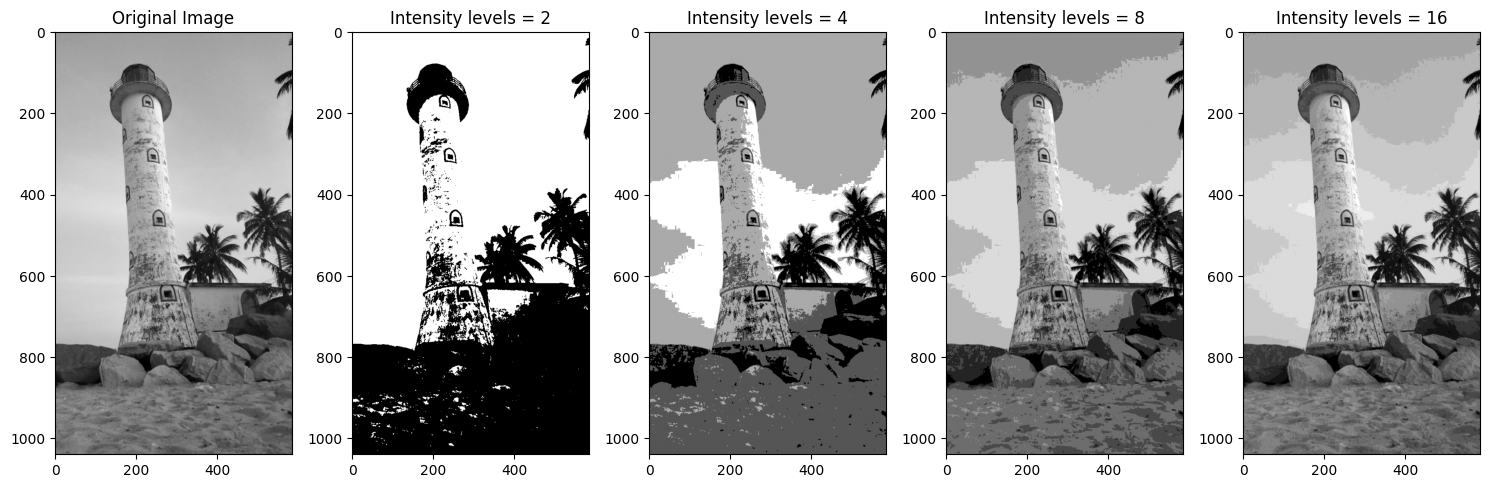

In [37]:
# Function to reduce intensity levels
def reduce_intensity_levels(img, levels):
    factor = 256 // levels
    reduced_img = (img // factor) * factor
    return reduced_img

# Levels to apply
levels_list = [2, 4, 8, 16]

# Prepare subplots
fig, arr = plt.subplots(1, len(levels_list) + 1, figsize=(15, 5))

# Show original
arr[0].imshow(img, cmap='gray')
arr[0].set_title('Original Image')
arr[0].axis('on')

# Apply and show each reduced intensity image
for i, lvl in enumerate(levels_list):
    reduced = reduce_intensity_levels(img, lvl)
    cv2.imwrite(f'images/reduced_{lvl}_levels.jpg', reduced)

    arr[i + 1].imshow(reduced, cmap='gray')
    arr[i + 1].set_title(f'Intensity levels = {lvl}')
    arr[i + 1].axis('on')

plt.tight_layout()
plt.show()

# 2) Spatial Averaging (Smoothing)

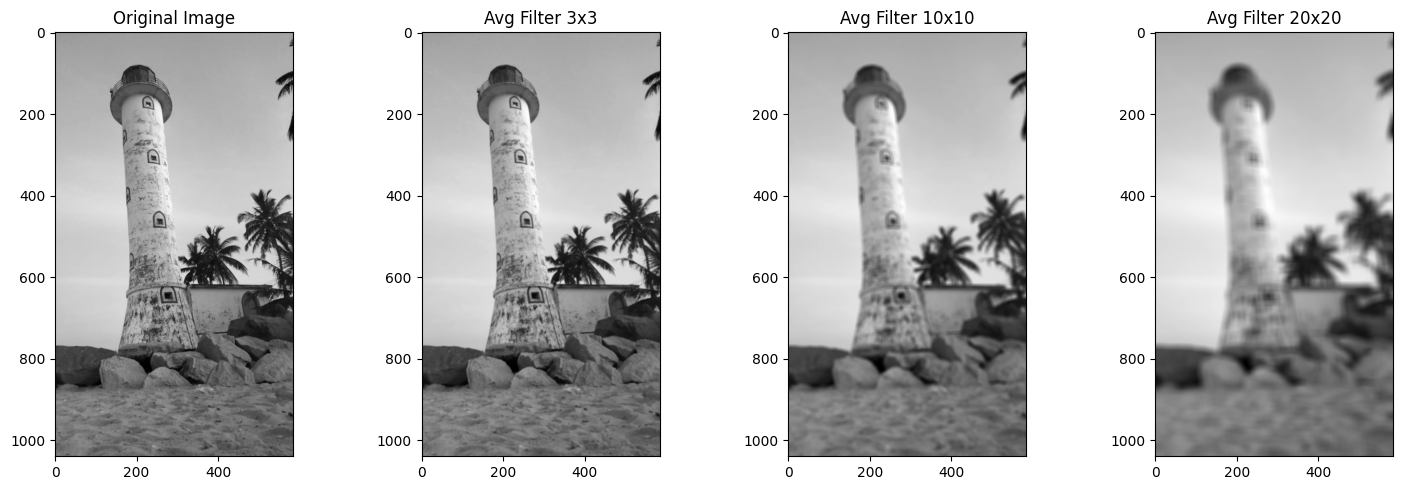

In [38]:
def average_filter(img, ksize):
    return cv2.blur(img, (ksize, ksize))

ksize_list = [3, 10, 20]
fig, arr = plt.subplots(1, len(ksize_list) + 1, figsize=(15, 5))
arr[0].imshow(img, cmap='gray')
arr[0].set_title('Original Image')
arr[0].axis('on')

for i, k in enumerate(ksize_list):
    avg = average_filter(img, k)
    cv2.imwrite(f'images/avg_{k}x{k}.jpg', avg)
    arr[i + 1].imshow(avg, cmap='gray')
    arr[i + 1].set_title(f'Avg Filter {k}x{k}')
    arr[i + 1].axis('on')

plt.tight_layout()
plt.show()

# 3) Image Rotation

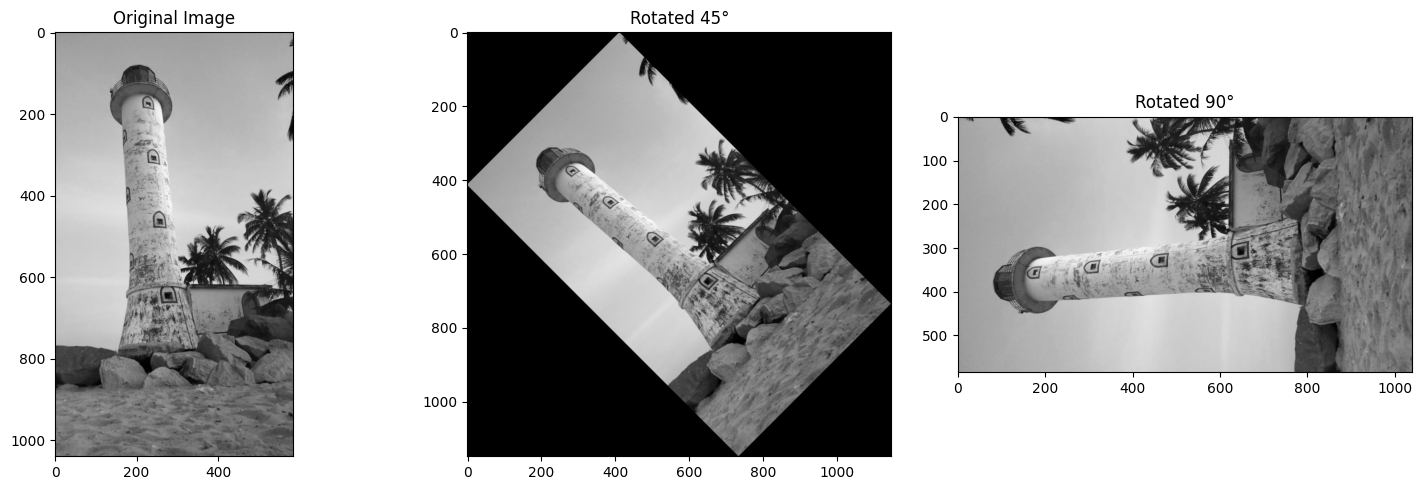

In [39]:
def rotate_image(img, angle):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    cos = np.abs(matrix[0, 0])
    sin = np.abs(matrix[0, 1])
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    matrix[0, 2] += (nW / 2) - center[0]
    matrix[1, 2] += (nH / 2) - center[1]
    rotated = cv2.warpAffine(img, matrix, (nW, nH))
    return rotated

angle_list = [45, 90]
fig, arr = plt.subplots(1, len(angle_list) + 1, figsize=(15, 5))
arr[0].imshow(img, cmap='gray')
arr[0].set_title('Original Image')
arr[0].axis('on')

for i, angle in enumerate(angle_list):
    rot = rotate_image(img, angle)
    cv2.imwrite(f'images/rotated_{angle}.jpg', rot)
    arr[i + 1].imshow(rot, cmap='gray')
    arr[i + 1].set_title(f'Rotated {angle}°')
    arr[i + 1].axis('on')

plt.tight_layout()
plt.show()

# 4) Reduce Resolution via Block Averaging

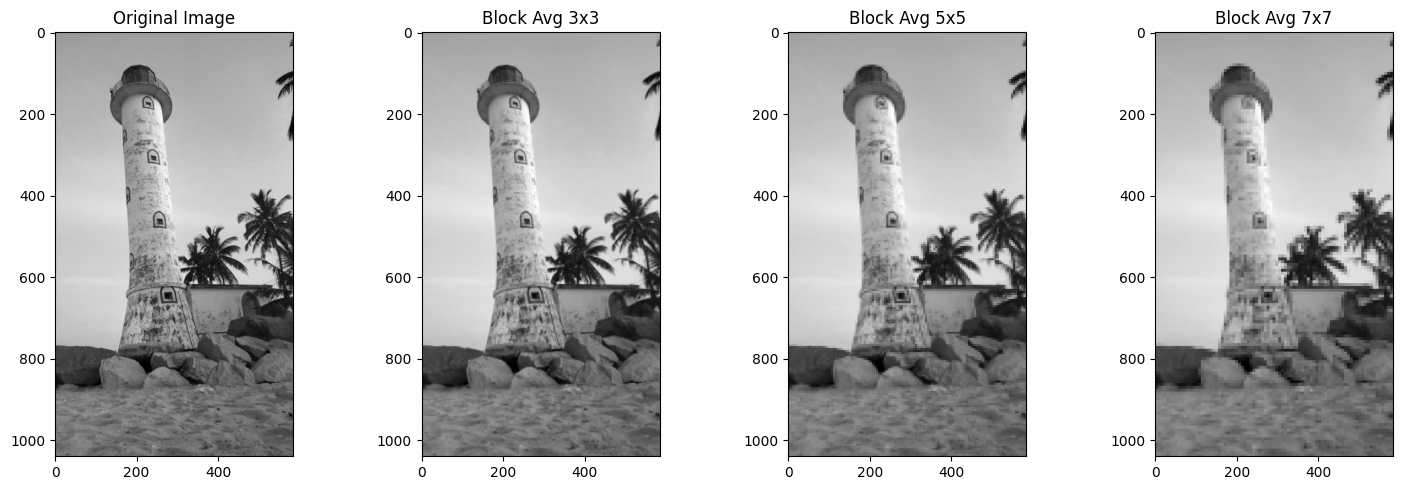

In [40]:
def block_average(img, block_size):
    h, w = img.shape
    reduced_img = np.copy(img)
    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            y_end = min(y + block_size, h)
            x_end = min(x + block_size, w)
            block = img[y:y_end, x:x_end]
            avg_val = block.mean().astype(np.uint8)
            reduced_img[y:y_end, x:x_end] = avg_val
    return reduced_img

block_list = [3, 5, 7]
fig, arr = plt.subplots(1, len(block_list) + 1, figsize=(15, 5))
arr[0].imshow(img, cmap='gray')
arr[0].set_title('Original Image')
arr[0].axis('on')

for i, b in enumerate(block_list):
    block = block_average(img, b)
    cv2.imwrite(f'images/block_{b}x{b}.jpg', block)
    arr[i + 1].imshow(block, cmap='gray')
    arr[i + 1].set_title(f'Block Avg {b}x{b}')
    arr[i + 1].axis('on')

plt.tight_layout()
plt.show()